In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


df=pd.read_csv(r"C:\Users\samir\Downloads\airline_passenger_satisfaction.csv")

print(df.info)
print(df.describe())
# Comprobar los valores faltantes  
missing_values = df.isnull().sum()  
print(missing_values[missing_values > 0]) 


<bound method DataFrame.info of         Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  F

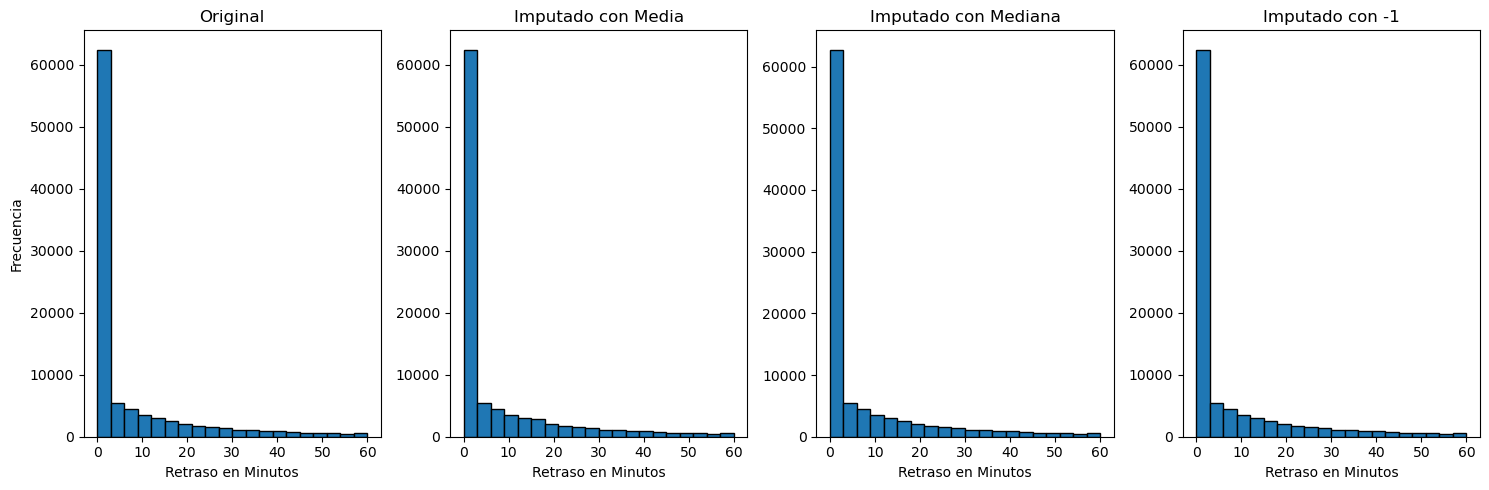

        Original  Imputado con Media  Imputado con Mediana  Imputado con -1
0           18.0                18.0                  18.0             18.0
1            6.0                 6.0                   6.0              6.0
2            0.0                 0.0                   0.0              0.0
3            9.0                 9.0                   9.0              9.0
4            0.0                 0.0                   0.0              0.0
...          ...                 ...                   ...              ...
103899       0.0                 0.0                   0.0              0.0
103900       0.0                 0.0                   0.0              0.0
103901      14.0                14.0                  14.0             14.0
103902       0.0                 0.0                   0.0              0.0
103903       0.0                 0.0                   0.0              0.0

[103904 rows x 4 columns]


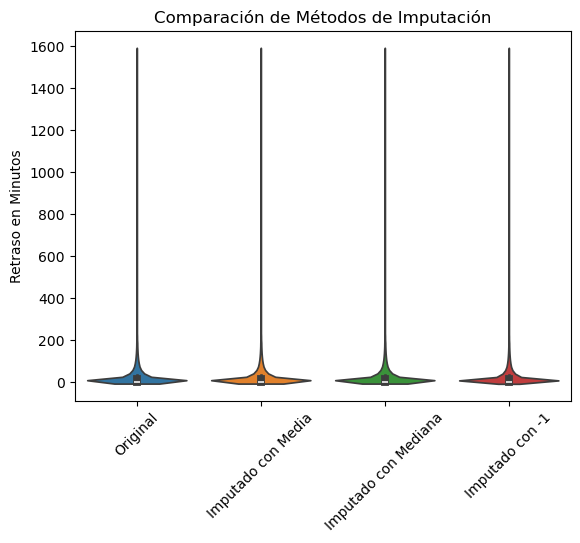

<Figure size 1200x600 with 0 Axes>

Número de datos menores o iguales al cuartil 75: 78144
Media de los datos entre el cuartil 3 y el máximo: 55.25 minutos


In [2]:
# Manejo de Valores faltantes
# Copia del DataFrame original para preservar los datos
df_original = df.copy()

# Imputación con la media
mean_value = df['Arrival Delay in Minutes'].mean()
df['Imputed_Mean'] = df['Arrival Delay in Minutes'].fillna(mean_value)

# Imputación con la mediana
median_value = df['Arrival Delay in Minutes'].median()
df['Imputed_Median'] = df_original['Arrival Delay in Minutes'].fillna(median_value)  # Usamos el DataFrame original para evitar sobreescrituras

# Imputación con -1
df['Imputed_NegativeOne'] = df_original['Arrival Delay in Minutes'].fillna(-1)

# Crear un DataFrame para comparar
comparison_df = pd.DataFrame({'Original': df_original['Arrival Delay in Minutes'],
                              'Imputado con Media': df['Imputed_Mean'],
                              'Imputado con Mediana': df['Imputed_Median'],
                              'Imputado con -1': df['Imputed_NegativeOne']})

# Visualización
plt.figure(figsize=(15, 5))

# Histograma de los datos originales
plt.subplot(1, 4, 1)
plt.hist(df_original['Arrival Delay in Minutes'], bins=20, range=(0,60), edgecolor='black')
plt.title('Original')
plt.xlabel('Retraso en Minutos')
plt.ylabel('Frecuencia')

# Histograma de los datos imputados con la media
plt.subplot(1, 4, 2)
plt.hist(df['Imputed_Mean'], bins=20,range=(0,60), edgecolor='black')
plt.title('Imputado con Media')
plt.xlabel('Retraso en Minutos')

# Histograma de los datos imputados con la mediana
plt.subplot(1, 4, 3)
plt.hist(df['Imputed_Median'], bins=20,range=(0,60), edgecolor='black')
plt.title('Imputado con Mediana')
plt.xlabel('Retraso en Minutos')

# Histograma de los datos imputados con -1
plt.subplot(1, 4, 4)
plt.hist(df['Imputed_NegativeOne'], bins=20,range=(0,60), edgecolor='black')
plt.title('Imputado con -1')
plt.xlabel('Retraso en Minutos')

plt.tight_layout()
plt.show()

# Mostrar el DataFrame de comparación
print(comparison_df)

# Crear gráficos de violín con mejoras
sns.violinplot(data=comparison_df)
plt.title('Comparación de Métodos de Imputación')
plt.ylabel('Retraso en Minutos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x 45 grados
plt.figure(figsize=(12, 6))  # Aumentar el tamaño de la figura
plt.show()


# Calcular el cuartil 75
q3 = df_original['Arrival Delay in Minutes'].quantile(0.75)

# Calcular el valor máximo (equivalente al cuartil 100)
q4 = df_original['Arrival Delay in Minutes'].max()

# Contar los valores menores o iguales al cuartil 75
count_q3 = (df_original['Arrival Delay in Minutes'] <= q3).sum()

# Filtrar los datos entre el cuartil 3 y el máximo
datos_entre_cuartiles = df_original[(df_original['Arrival Delay in Minutes'] >= q3) & (df_original['Arrival Delay in Minutes'] <= q4)]

# Calcular la media de los datos filtrados
media_entre_cuartiles = datos_entre_cuartiles['Arrival Delay in Minutes'].mean()

print("Número de datos menores o iguales al cuartil 75:", count_q3)
print("Media de los datos entre el cuartil 3 y el máximo:", media_entre_cuartiles.round(2),"minutos")

df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(-1)


Column: Unnamed: 0
count    103904.000000
mean      51951.500000
std       29994.645522
min           0.000000
25%       25975.750000
50%       51951.500000
75%       77927.250000
max      103903.000000
Name: Unnamed: 0, dtype: float64


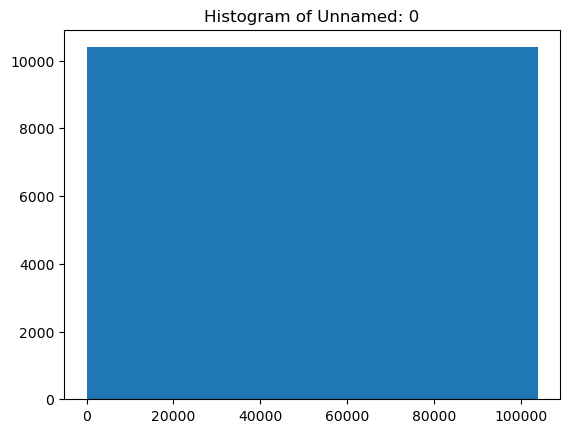


Column: id
count    103904.000000
mean      64924.210502
std       37463.812252
min           1.000000
25%       32533.750000
50%       64856.500000
75%       97368.250000
max      129880.000000
Name: id, dtype: float64


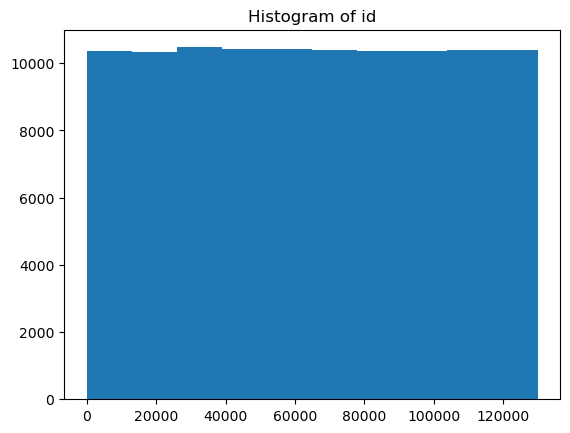


Column: Age
count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64


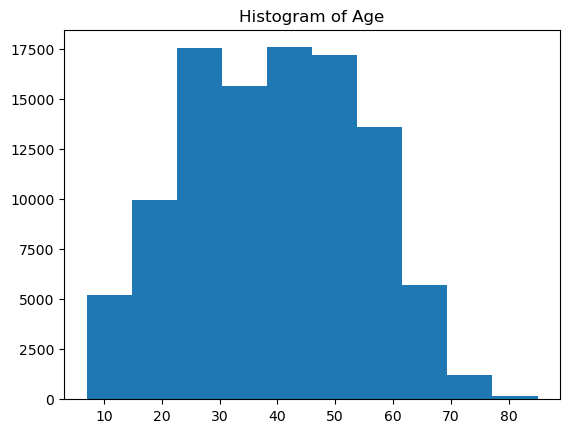


Column: Flight Distance
count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64


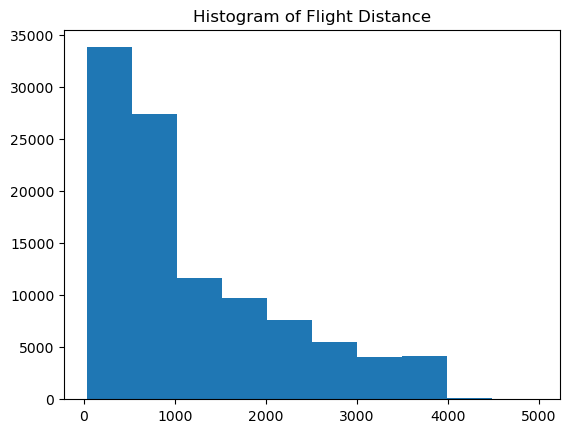


Column: Inflight wifi service
count    103904.000000
mean          2.729683
std           1.327829
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Inflight wifi service, dtype: float64


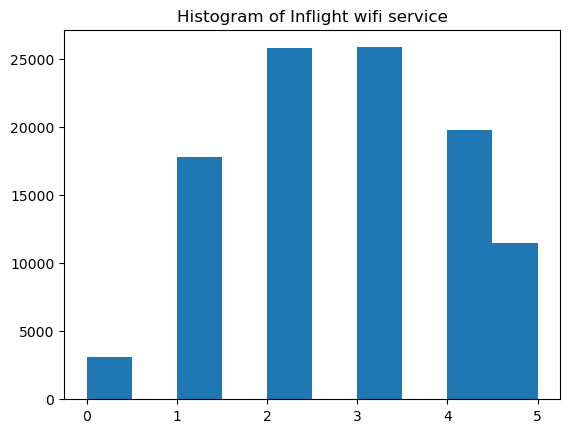


Column: Departure/Arrival time convenient
count    103904.000000
mean          3.060296
std           1.525075
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Departure/Arrival time convenient, dtype: float64


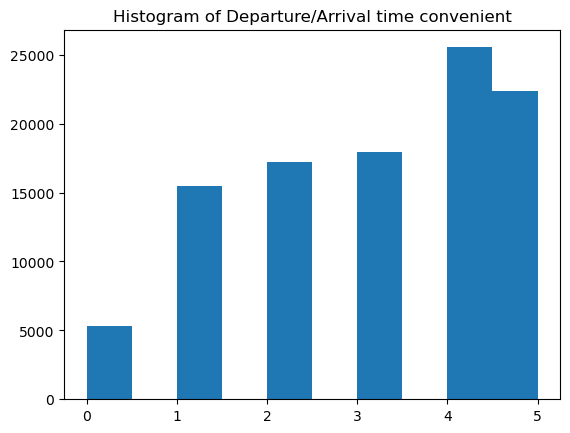


Column: Ease of Online booking
count    103904.000000
mean          2.756901
std           1.398929
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Ease of Online booking, dtype: float64


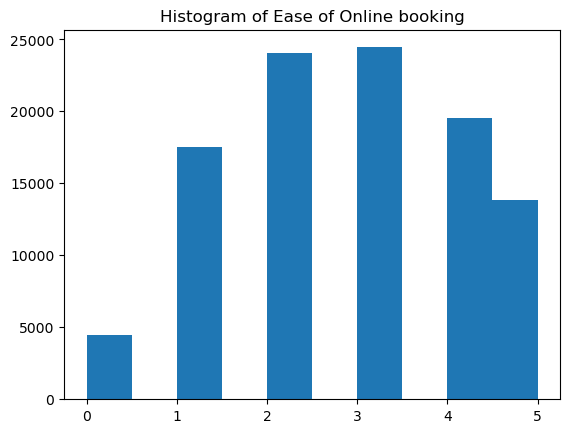


Column: Gate location
count    103904.000000
mean          2.976883
std           1.277621
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Gate location, dtype: float64


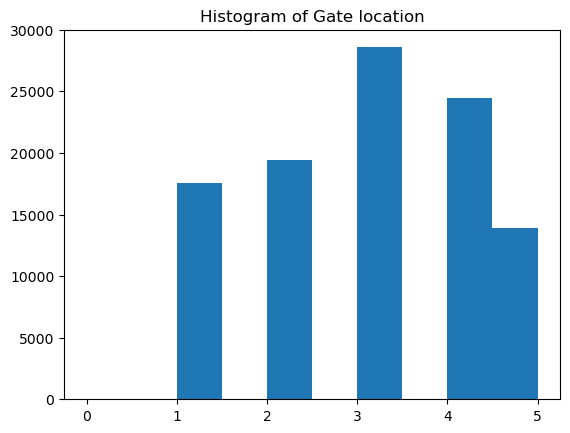


Column: Food and drink
count    103904.000000
mean          3.202129
std           1.329533
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Food and drink, dtype: float64


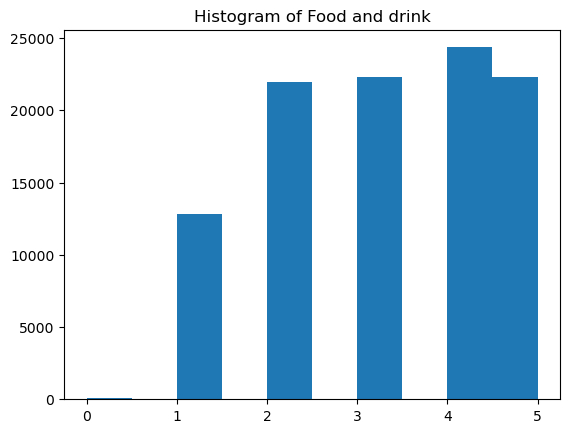


Column: Online boarding
count    103904.000000
mean          3.250375
std           1.349509
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Online boarding, dtype: float64


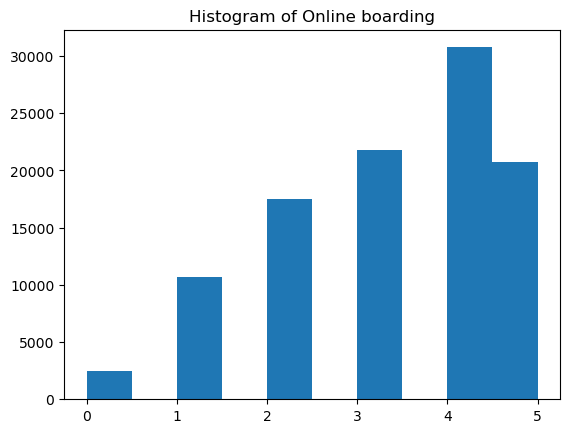


Column: Seat comfort
count    103904.000000
mean          3.439396
std           1.319088
min           0.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Seat comfort, dtype: float64


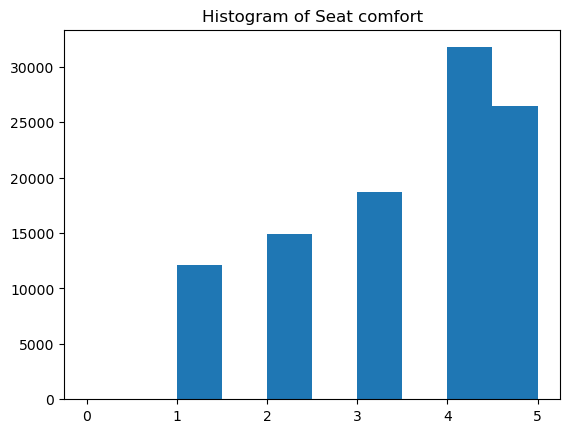


Column: Inflight entertainment
count    103904.000000
mean          3.358158
std           1.332991
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: Inflight entertainment, dtype: float64


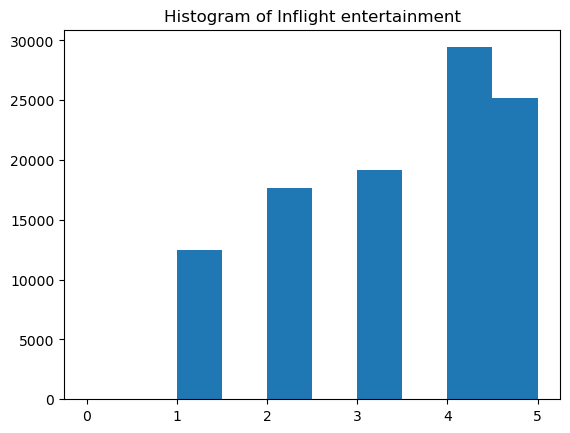


Column: On-board service
count    103904.000000
mean          3.382363
std           1.288354
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: On-board service, dtype: float64


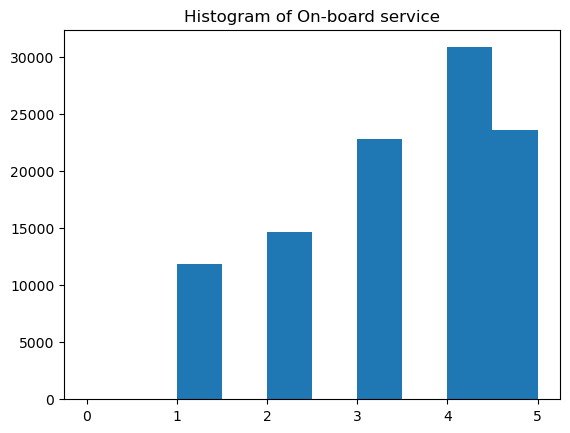


Column: Leg room service
count    103904.000000
mean          3.351055
std           1.315605
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: Leg room service, dtype: float64


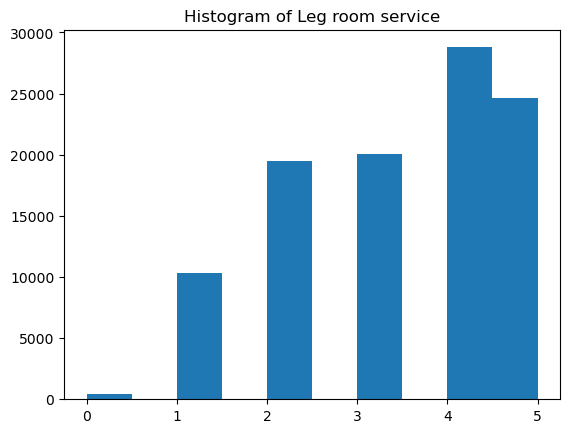


Column: Baggage handling
count    103904.000000
mean          3.631833
std           1.180903
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Baggage handling, dtype: float64


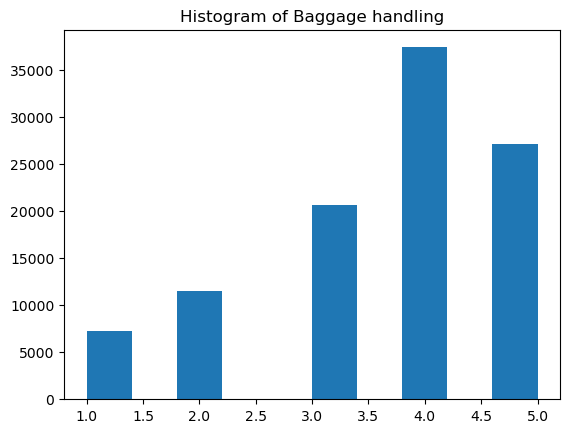


Column: Checkin service
count    103904.000000
mean          3.304290
std           1.265396
min           0.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Checkin service, dtype: float64


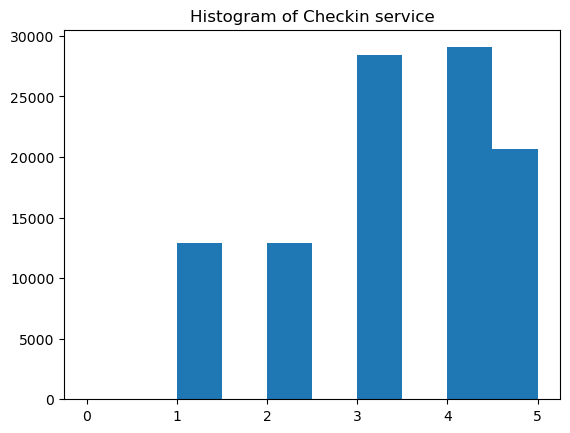


Column: Inflight service
count    103904.000000
mean          3.640428
std           1.175663
min           0.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Inflight service, dtype: float64


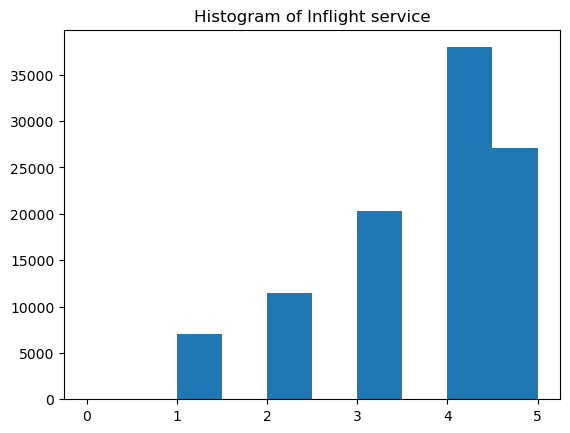


Column: Cleanliness
count    103904.000000
mean          3.286351
std           1.312273
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Cleanliness, dtype: float64


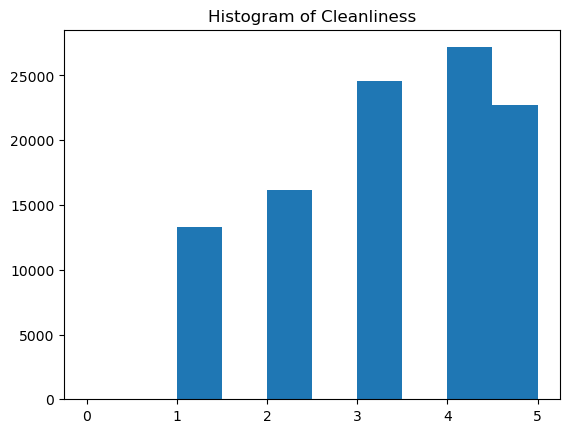


Column: Departure Delay in Minutes
count    103904.000000
mean         14.815618
std          38.230901
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64


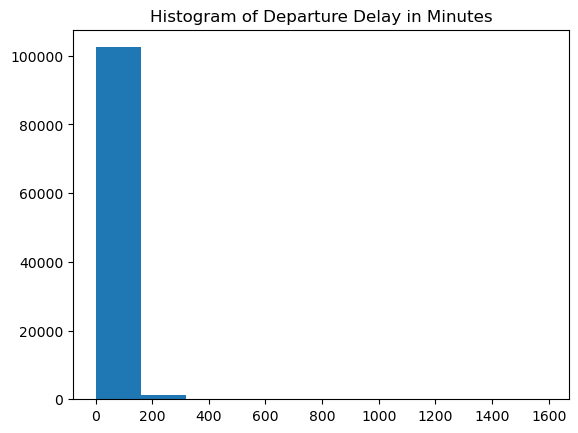


Column: Arrival Delay in Minutes
count    103904.000000
mean         15.130409
std          38.650983
min          -1.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64


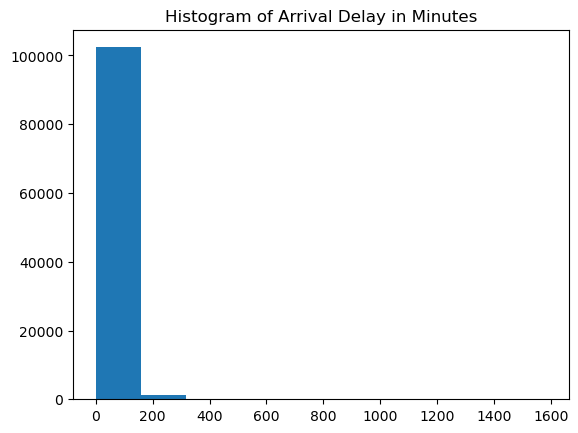


Column: Imputed_Mean
count    103904.000000
mean         15.178678
std          38.640909
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Imputed_Mean, dtype: float64


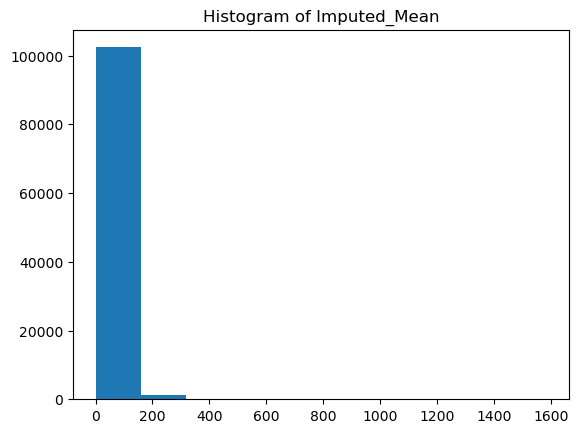


Column: Imputed_Median
count    103904.000000
mean         15.133392
std          38.649776
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Imputed_Median, dtype: float64


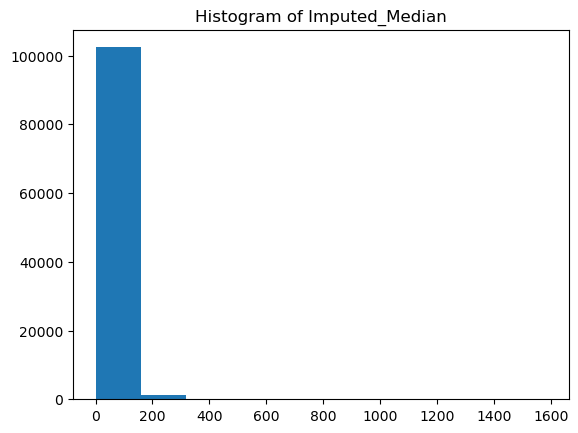


Column: Imputed_NegativeOne
count    103904.000000
mean         15.130409
std          38.650983
min          -1.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Imputed_NegativeOne, dtype: float64


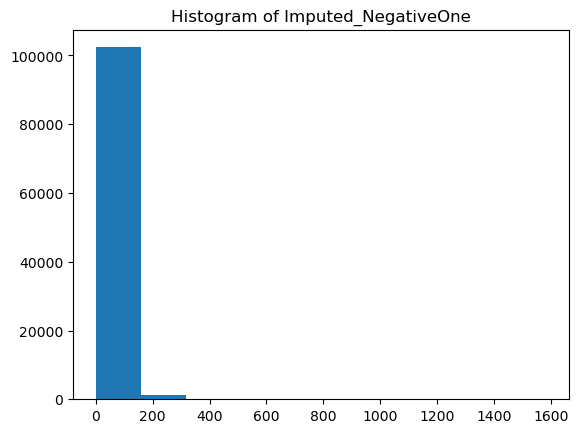

In [3]:
#Exploración numerica de variables con sus respectivos histogramas (incluye histogramas de imputaciones)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    print(f"\nColumn: {column}")
    print(df[column].describe())
    plt.hist(df[column])
    plt.title(f"Histogram of {column}")
    plt.show()

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  

# Codificación de la variable objetivo  
label_encoder = LabelEncoder()  
df['satisfaction'] = label_encoder.fit_transform(df['satisfaction'])  

# Codificación de variables categóricas nominales  
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  

# Ajustar y transformar las variables categóricas  
categorical_columns = ['Class', 'Type of Travel']  
encoded_features = one_hot_encoder.fit_transform(df[categorical_columns])  

# Crear DataFrame para las variables codificadas  
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_columns))  

# Concatenar los DataFrames codificados al original  
df = pd.concat([df, encoded_df], axis=1)  

# Codificación de 'Customer Type' y 'Gender'  
df['Customer Type'] = label_encoder.fit_transform(df['Customer Type'])  
df['Gender'] = label_encoder.fit_transform(df['Gender'])  

# Eliminar las columnas originales  
#df.drop(categorical_columns, axis=1, inplace=True)  
# Crear una lista de columnas a eliminar excluyendo 'Imputed_NegativeOne'
columns_to_drop = [col for col in categorical_columns if col != 'Imputed_NegativeOne']

# Eliminar las columnas especificadas
df.drop(columns_to_drop, axis=1, inplace=True)

# Mostrar el DataFrame final  
print(df.head(5))

   Unnamed: 0      id  Gender  Customer Type  Age  Flight Distance  \
0           0   70172       1              0   13              460   
1           1    5047       1              1   25              235   
2           2  110028       0              0   26             1142   
3           3   24026       0              0   25              562   
4           4  119299       1              0   61              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Cleanliness  \
0                       3              1  ...            5   
1                       3              3  ...            1   
2             

In [5]:
import dask.dataframe as dd
from sklearn.impute import KNNImputer
import pandas as pd

# Convertir el DataFrame de pandas a un DataFrame de Dask
ddf = dd.from_pandas(df, npartitions=10)

# Crear el imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Definir una función para aplicar el imputador a cada partición
def impute_partition(partition):
    return pd.DataFrame(imputer.fit_transform(partition), columns=partition.columns)

# Aplicar el imputador en paralelo a cada partición
ddf = ddf.map_partitions(impute_partition)

# Convertir de nuevo a pandas
df = ddf.compute()


In [6]:
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Seleccionar las columnas numéricas
numeric_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Imputed_Median']

# Aplicar el escalador
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [11]:
df['Departure Delay in Minutes'] = scaler.fit_transform(df[['Departure Delay in Minutes']])


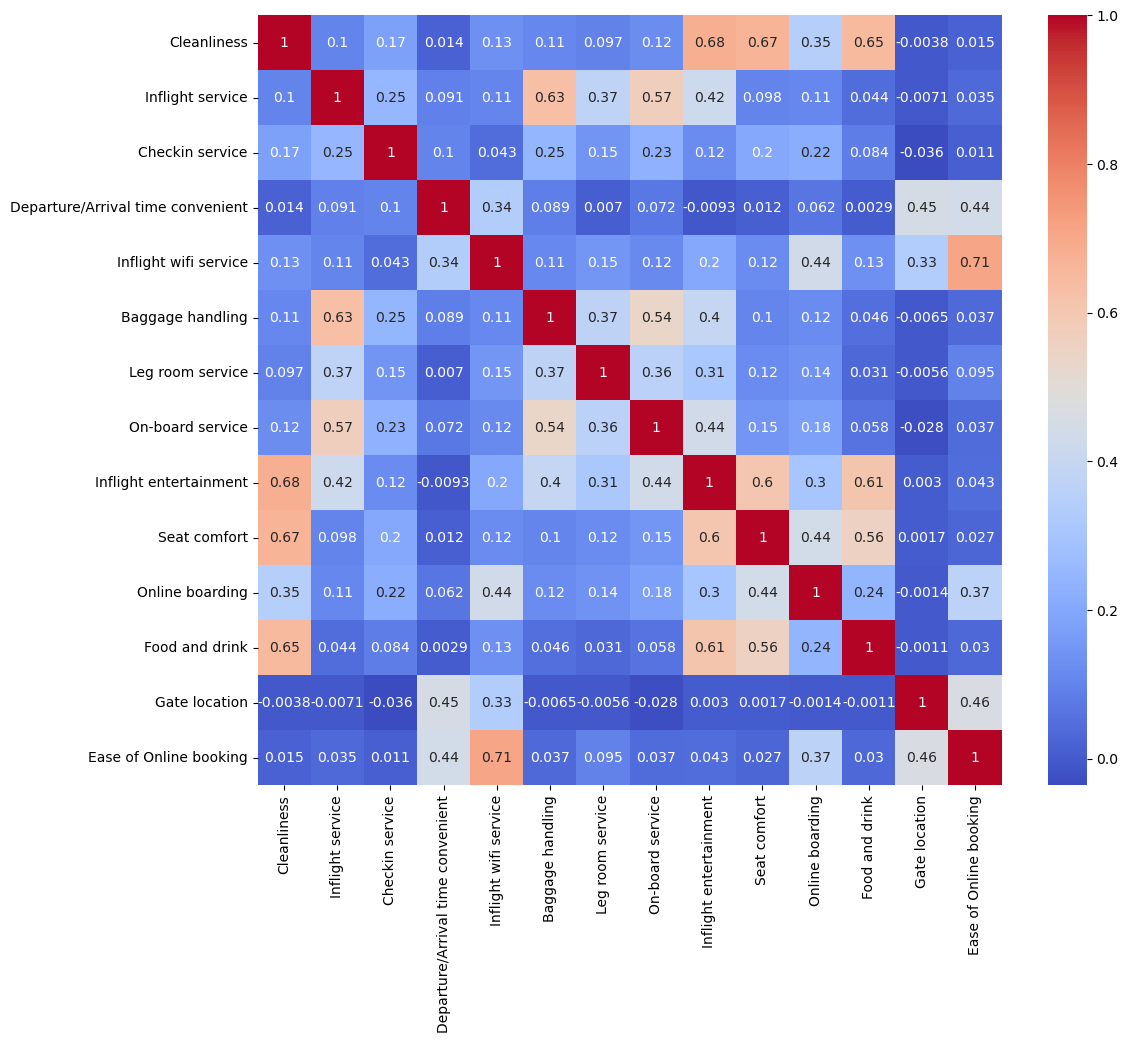

In [7]:
#matriz de correlación de Spearman datos ordinales

# Definir las columnas ordinales (ajusta los nombres según tus columnas)
columnas_ordinales = ['Cleanliness', 'Inflight service', 'Checkin service','Departure/Arrival time convenient','Inflight wifi service','Baggage handling','Leg room service','On-board service','Inflight entertainment','Seat comfort','Online boarding','Food and drink','Gate location','Ease of Online booking']

# Calcular la matriz de correlación de Spearman SOLO para las columnas ordinales
corr_matrix_ordinales = df[columnas_ordinales].corr(method='spearman')
plt.figure(figsize=(12,10))

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix_ordinales, annot=True, cmap='coolwarm')
plt.show()


##Relaciones positivas fuertes:##

###Limpieza y servicio a bordo: Existe una fuerte correlación positiva entre la percepción de limpieza y la calidad del servicio a bordo.


###Comodidad del asiento y entretenimiento a bordo: La comodidad del asiento y la calidad del entretenimiento a bordo están fuertemente relacionadas.


###Facilidad de reserva online y satisfacción general: La facilidad para realizar la reserva en línea se relaciona positivamente con la satisfacción general del cliente.

##Relaciones negativas:##


###Retrasos y satisfacción general: Los retrasos en los vuelos se relacionan negativamente con la satisfacción en varios aspectos, como el servicio a bordo, la comodidad del asiento y la facilidad de reserva online.


###Problemas con el equipaje y satisfacción: Los problemas con el equipaje también tienen un impacto negativo en la satisfacción general del cliente.



In [8]:
# Índice de comodidad
comfort_index = (df['Seat comfort']*0.4 + df['Leg room service']*0.3 + df['On-board service']*0.3)

# Índice de servicio
service_index = (df['Inflight service']*0.5 + df['Checkin service']*0.3 + df['On-board service']*0.2)